# cGAN using CycleGAN

In [ ]:
import cv2
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513
Receiving objects: 100% (2513/2513), 8.20 MiB | 9.54 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [ ]:
%cd pytorch-CycleGAN-and-pix2pix/

/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408216 sha256=ee8f68d9f878a17d96950bbcaea9a40b390d5e8e5bc8a15be8210face0e67ff0
  Stored in directory: /root/.cache/pip/wheels/58/9e/14/30f7cc4dafdd4d602fb00ca33c6edd1424fc0f5df10a02e060
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=28246df42930c113562722806a3040d10fb317179c48dcbd00d0932394b69f57
  Sto


# Horse to zebra

## Loading the model

Available models:

> `[apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

> Models: http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/


In [ ]:
model_name = "horse2zebra"

In [ ]:
model_directory = "./checkpoints/{}_pretrained/".format(model_name)
model_directory

'./checkpoints/horse2zebra_pretrained/'

In [ ]:
!mkdir -p {model_directory}

In [ ]:
url_model = "http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/{}.pth".format(model_name)

In [ ]:
!wget -N {url_model}

--2023-04-12 17:47:47--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/horse2zebra.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘horse2zebra.pth’

horse2zebra.pth     100%[===================>]  43.46M  12.1MB/s    in 3.8s    

2023-04-12 17:47:52 (11.6 MB/s) - ‘horse2zebra.pth’ saved [45575747/45575747]



In [ ]:
!mv {model_name}.pth {model_directory}latest_net_G.pth

In [ ]:
!mkdir -p images/horses/

## Testing the model

In [ ]:
!python test.py --dataroot images/horses --name {model_name}_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: images/horses                 	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [ ]:
results_directory = "./results/{}_pretrained/test_latest/images/".format(model_name)

In [ ]:
example_image = "horse1"

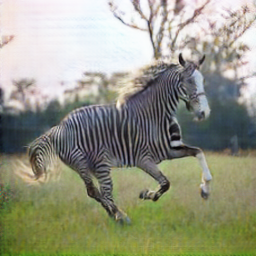

In [ ]:
result_img = cv2.imread(results_directory + "{}_fake.png".format(example_image))
cv2_imshow(result_img)

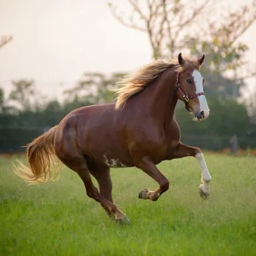

In [ ]:
result_img = cv2.imread(results_directory + "{}_real.png".format(example_image))
cv2_imshow(result_img)

In [ ]:
def show_results(img_name, directory):
  input_img = cv2.imread(directory + img_name + "_real.png")
  result_img = cv2.imread(directory + img_name + "_fake.png")

  imgs = [input_img, result_img]
  titulo = ["Original", "Output"]

  plt.figure(figsize=(10, 6))
  for i in range(len(imgs)):
    plt.subplot(1, 2, i+1)
    plt.title(titulo[i])
    plt.axis("off")
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
dir_imgs = "images/horses"
list_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith(".jpg")]
list_imgs

['horse2', 'horse1', 'horse3']


Result for image horse2:


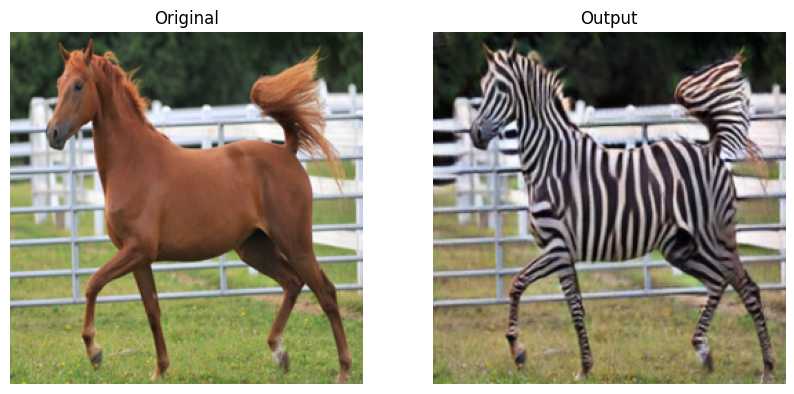


Result for image horse1:


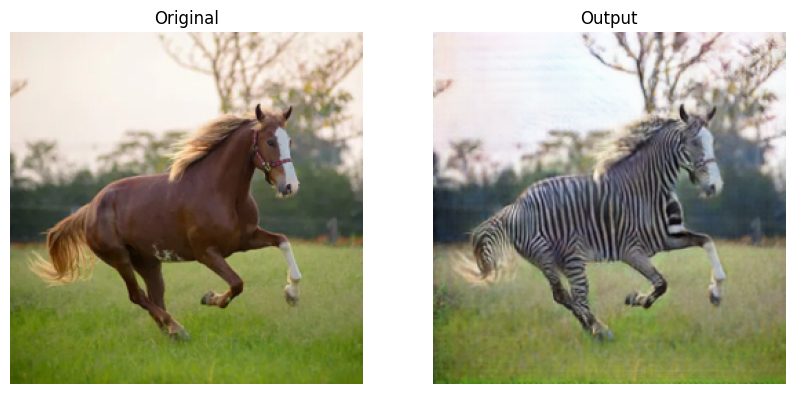


Result for image horse3:


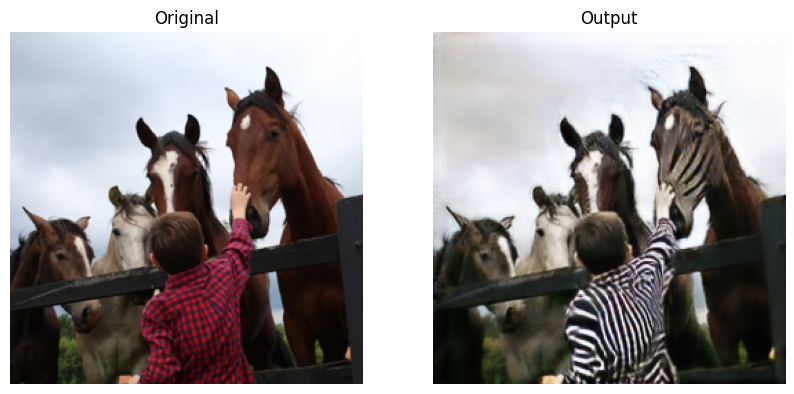

In [ ]:
for img in list_imgs:
  print("\nResult for image {}:".format(img))
  show_results(img, results_directory)

# Photo to painting (style transfer)

## Monet style

In [ ]:
model_name = "style_monet"
model_directory = "./checkpoints/{}_pretrained/".format(model_name)

In [ ]:
!mkdir -p {model_directory}
url_model = "http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/{}.pth".format(model_name)

In [ ]:
!wget -N {url_model}
!mv {model_name}.pth {model_directory}latest_net_G.pth

--2023-04-12 18:00:02--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_monet.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘style_monet.pth’

style_monet.pth     100%[===================>]  43.46M  12.0MB/s    in 3.8s    

2023-04-12 18:00:07 (11.5 MB/s) - ‘style_monet.pth’ saved [45575747/45575747]



In [ ]:
# train, river, bridge, urban, urban02, city, butterfly, lego, flowers, hammer

In [ ]:
!python test.py --dataroot images/ --name {model_name}_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: images/                       	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [ ]:
results_directory = "./results/{}_pretrained/test_latest/images/".format(model_name)
dir_imgs = "images/"
list_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith(".jpg")]
list_imgs

['train',
 'river',
 'urban02',
 'urban',
 'lego',
 'butterfly',
 'flowers',
 'bridge',
 'hammer',
 'city']

In [ ]:
for img in list_imgs:
  print("\nResult for image {}:".format(img))
  show_results(img, results_directory)

## Van Gogh style

In [ ]:
model_name = "style_vangogh"
model_directory = "./checkpoints/{}_pretrained/".format(model_name)
!mkdir -p {model_directory}
url_model = "http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/{}.pth".format(model_name)
!wget -N {url_model}
!mv {model_name}.pth {model_directory}latest_net_G.pth

--2023-04-12 18:17:52--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘style_vangogh.pth’

style_vangogh.pth   100%[===================>]  43.46M  12.2MB/s    in 3.8s    

2023-04-12 18:17:56 (11.6 MB/s) - ‘style_vangogh.pth’ saved [45575747/45575747]



In [ ]:
!python test.py --dataroot images/ --name {model_name}_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: images/                       	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [ ]:
results_directory = "./results/{}_pretrained/test_latest/images/".format(model_name)
dir_imgs = "images/"
list_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith(".jpg")]

for img in list_imgs:
  print("\nResult for image {}:".format(img))
  show_results(img, results_directory)

## Cezanne style

In [ ]:
model_name = "style_cezanne"
model_directory = "./checkpoints/{}_pretrained/".format(model_name)
!mkdir -p {model_directory}
url_model = "http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/{}.pth".format(model_name)
!wget -N {url_model}
!mv {model_name}.pth {model_directory}latest_net_G.pth

--2023-04-12 18:20:59--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_cezanne.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘style_cezanne.pth’

style_cezanne.pth   100%[===================>]  43.46M  12.1MB/s    in 3.8s    

2023-04-12 18:21:04 (11.6 MB/s) - ‘style_cezanne.pth’ saved [45575747/45575747]



In [ ]:
!python test.py --dataroot images/ --name {model_name}_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: images/                       	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [ ]:
results_directory = "./results/{}_pretrained/test_latest/images/".format(model_name)
dir_imgs = "images/"
list_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith(".jpg")]

for img in list_imgs:
  print("\nResult for image {}:".format(img))
  show_results(img, results_directory)

## Ukiyo-e style

In [ ]:
model_name = "style_ukiyoe"
model_directory = "./checkpoints/{}_pretrained/".format(model_name)
!mkdir -p {model_directory}
url_model = "http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/{}.pth".format(model_name)
!wget -N {url_model}
!mv {model_name}.pth {model_directory}latest_net_G.pth

--2023-04-12 18:22:10--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_ukiyoe.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘style_ukiyoe.pth’

style_ukiyoe.pth    100%[===================>]  43.46M  12.1MB/s    in 3.8s    

2023-04-12 18:22:15 (11.5 MB/s) - ‘style_ukiyoe.pth’ saved [45575747/45575747]



In [ ]:
!python test.py --dataroot images/ --name {model_name}_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: images/                       	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [ ]:
results_directory = "./results/{}_pretrained/test_latest/images/".format(model_name)
dir_imgs = "images/"
list_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith(".jpg")]

for img in list_imgs:
  print("\nResult for image {}:".format(img))
  show_results(img, results_directory)